# Práctica 3: Construcción de una gramática independiente del contexto y su analizador con Python NLTK

Federico Ortega Riba

## 3) De las oraciones anteriores, ¿cuáles son agramaticales en español? ¿por qué son agramaticales?

La oración *d* es la única agramatical, ya que no respeta las reglas de acuerdo de género entre un sustantivo (*manzana* en este caso) y sus modificadores.

En las tres últimas frases, aunque son gramaticalmente correctas en español, se aprecia el ejemplo de Chomsky: "Colorless green ideas sleep furiously" para demostrar que la semántica no siempre va de la mano de la gramática.

## Parte práctica con código

In [1]:
!pip install nltk
!pip install svgling

In [2]:
import nltk
from nltk import CFG
from nltk.parse import RecursiveDescentParser
from nltk.parse import BottomUpChartParser
from nltk.parse import ChartParser

from svgling import draw_tree

gramatica = CFG.fromstring("""
    O -> SN SV
    SN -> Det N | Det N Adj | NProp | Det Adj N
    SV -> V | V SN SPrep
    SPrep -> Prep SN
    NProp -> 'Ana' | 'Juan'
    N -> 'manzana' | 'cuchillo' | 'niño' | 'niña'
    Adj -> 'verde' | 'bonito' | 'pequeña'
    Det -> 'la' | 'una' | 'el' | 'un'
    Prep -> 'con' | 'desde' | 'de'
    V -> 'salta' | 'pela' | 'come' | 'persigue_a'
""")

analizador = ChartParser(gramatica)

In [3]:
gramatica

<Grammar with 28 productions>

In [4]:
type(gramatica)

nltk.grammar.CFG

In [5]:
gramatica.start()

O

In [6]:
gramatica.productions()

[O -> SN SV,
 SN -> Det N,
 SN -> Det N Adj,
 SN -> NProp,
 SN -> Det Adj N,
 SV -> V,
 SV -> V SN SPrep,
 SPrep -> Prep SN,
 NProp -> 'Ana',
 NProp -> 'Juan',
 N -> 'manzana',
 N -> 'cuchillo',
 N -> 'niño',
 N -> 'niña',
 Adj -> 'verde',
 Adj -> 'bonito',
 Adj -> 'pequeña',
 Det -> 'la',
 Det -> 'una',
 Det -> 'el',
 Det -> 'un',
 Prep -> 'con',
 Prep -> 'desde',
 Prep -> 'de',
 V -> 'salta',
 V -> 'pela',
 V -> 'come',
 V -> 'persigue_a']

In [7]:
from nltk.grammar import *
gramatica.productions(lhs=Nonterminal("SN"))

[SN -> Det N, SN -> Det N Adj, SN -> NProp, SN -> Det Adj N]

In [8]:
gramatica.productions(rhs=Nonterminal("Det"))

[SN -> Det N, SN -> Det N Adj, SN -> Det Adj N]

In [9]:
import svgling

(O (SN (NProp Ana)) (SV (V salta)))


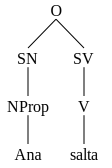

In [10]:
# Vamos a ir creando oraciones para poder utilizarlas luego
oracion1 = "Ana salta".split()

for arbol_sintactico1 in analizador.parse(oracion1):
    print(arbol_sintactico1)

draw_tree(arbol_sintactico1)

(O
  (SN (Det la) (N niña))
  (SV
    (V pela)
    (SN (Det una) (N manzana) (Adj verde))
    (SPrep (Prep con) (SN (Det el) (N cuchillo)))))


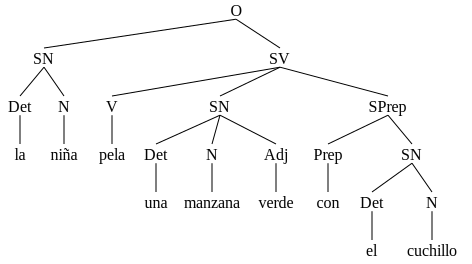

In [11]:
# Oración de entrada
oracion2 = "la niña pela una manzana verde con el cuchillo".split()

for arbol_sintactico2 in analizador.parse(oracion2):
    print(arbol_sintactico2)

draw_tree(arbol_sintactico2)

(O
  (SN (NProp Juan))
  (SV
    (V come)
    (SN (Det un) (N cuchillo) (Adj bonito))
    (SPrep (Prep desde) (SN (Det el) (N niño)))))


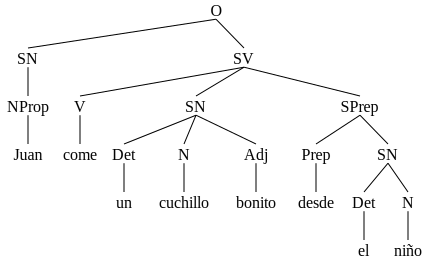

In [12]:
# Oración de entrada
oracion3 = "Juan come un cuchillo bonito desde el niño".split()

for arbol_sintactico3 in analizador.parse(oracion3):
    print(arbol_sintactico3)

draw_tree(arbol_sintactico3)

(O
  (SN (Det un) (N manzana) (Adj bonito))
  (SV
    (V salta)
    (SN (Det el) (N cuchillo))
    (SPrep (Prep desde) (SN (Det el) (N niño) (Adj verde)))))


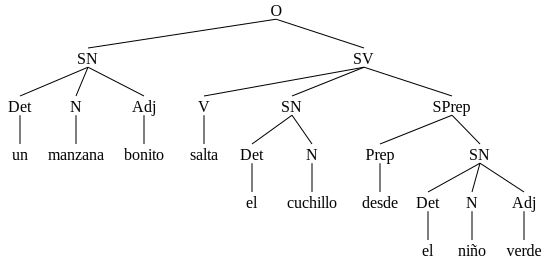

In [13]:
# Oración de entrada
oracion4 = "un manzana bonito salta el cuchillo desde el niño verde".split()

for arbol_sintactico4 in analizador.parse(oracion4):
    print(arbol_sintactico4)

draw_tree(arbol_sintactico4)

(O
  (SN (Det el) (N cuchillo) (Adj verde))
  (SV
    (V persigue_a)
    (SN (Det la) (Adj pequeña) (N manzana))
    (SPrep (Prep de) (SN (NProp Ana)))))


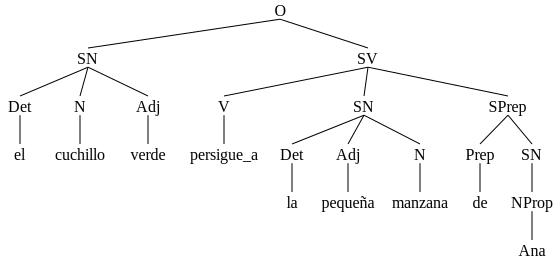

In [14]:
# Oración de entrada
oracion5 = "el cuchillo verde persigue_a la pequeña manzana de Ana".split()

for arbol_sintactico5 in analizador.parse(oracion5):
    print(arbol_sintactico5)

draw_tree(arbol_sintactico5)

In [15]:
#GRAMÁTICA AMPLIADA

GIC_ampliada = nltk.CFG.fromstring("""
  O -> SN SV
  SN -> Det N Adj | Det N | DET Adj N | NProp | Det Adj N | NProp SPrep | N SPrep
  SV -> V | V SN SPrep | V SPrep SPrep | V SPrep
  SPrep -> Prep SN
  NProp -> 'Ana' | 'Juan'
  V -> 'pela' | 'salta'| 'come' | 'persigue' | 've'
  Det -> 'la' | 'una' | 'el' | 'un'
  N -> 'niña' | 'cuchillo' | 'manzana' | 'niño' | 'telescopio'
  Adj -> 'bonito' | 'verde' | 'pequeña'
  Prep -> 'con' | 'desde' | 'de' | 'a'
""")

analizador = ChartParser(GIC_ampliada)

oracion6 = "Juan ve a Ana con el telescopio".split()

arboles_sintacticos = list(analizador.parse(oracion6))

for i, arbol_sintactico6 in enumerate(arboles_sintacticos):
    print(f"Árbol {i + 1}:")
    print(arbol_sintactico6)

Árbol 1:
(O
  (SN (NProp Juan))
  (SV
    (V ve)
    (SPrep (Prep a) (SN (NProp Ana)))
    (SPrep (Prep con) (SN (Det el) (N telescopio)))))
Árbol 2:
(O
  (SN (NProp Juan))
  (SV
    (V ve)
    (SPrep
      (Prep a)
      (SN
        (NProp Ana)
        (SPrep (Prep con) (SN (Det el) (N telescopio)))))))


Árbol 1:
(O
  (SN (NProp Juan))
  (SV
    (V ve)
    (SPrep (Prep a) (SN (NProp Ana)))
    (SPrep (Prep con) (SN (Det el) (N telescopio)))))


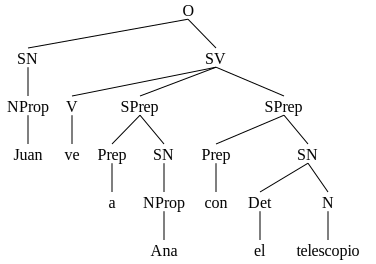

In [16]:
arbol_1 = arboles_sintacticos[0]
print("Árbol 1:")
print(arbol_1)

draw_tree(arbol_1)


Árbol 2:
(O
  (SN (NProp Juan))
  (SV
    (V ve)
    (SPrep
      (Prep a)
      (SN
        (NProp Ana)
        (SPrep (Prep con) (SN (Det el) (N telescopio)))))))


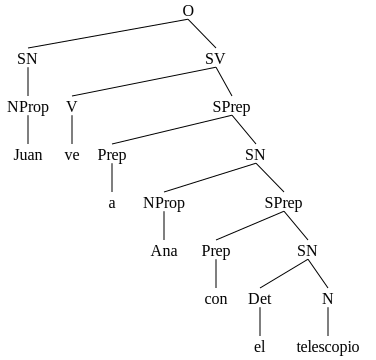

In [17]:
arbol_2 = arboles_sintacticos[1]
print("\nÁrbol 2:")
print(arbol_2)

draw_tree(arbol_2)

Es una oración ambigüa porque el analizador arroja dos posibles análisis dada la gramática.
De hecho, solo con el analizador ya vemos que se pueden crear dos árboles:
1. "con el telescopio" hace referencia al instrumento que ha usado Juan para ver a Ana
2. "con el telescopio" hace referencia al objeto que llevaba Ana cuando Juan la vio